# AR tag generation
Alvar, the ROS AR tracking package, comes with a feature to automatically generate AR tags. To generate them, you must first install ROS and the `ar_track_alvar` [package](https://wiki.ros.org/ar_track_alvar).

This can be used from the command line by running `rosrun ar_track_alvar createMarker`, which will describe the various command line options.

## Script for AR tag generation
This is a script to automatically generate 27 cm AR tags (27 cm black edge to black edge at 96 pixels per centimeter) with 1.5 cm margins on each side and the tag number included. They look like this:

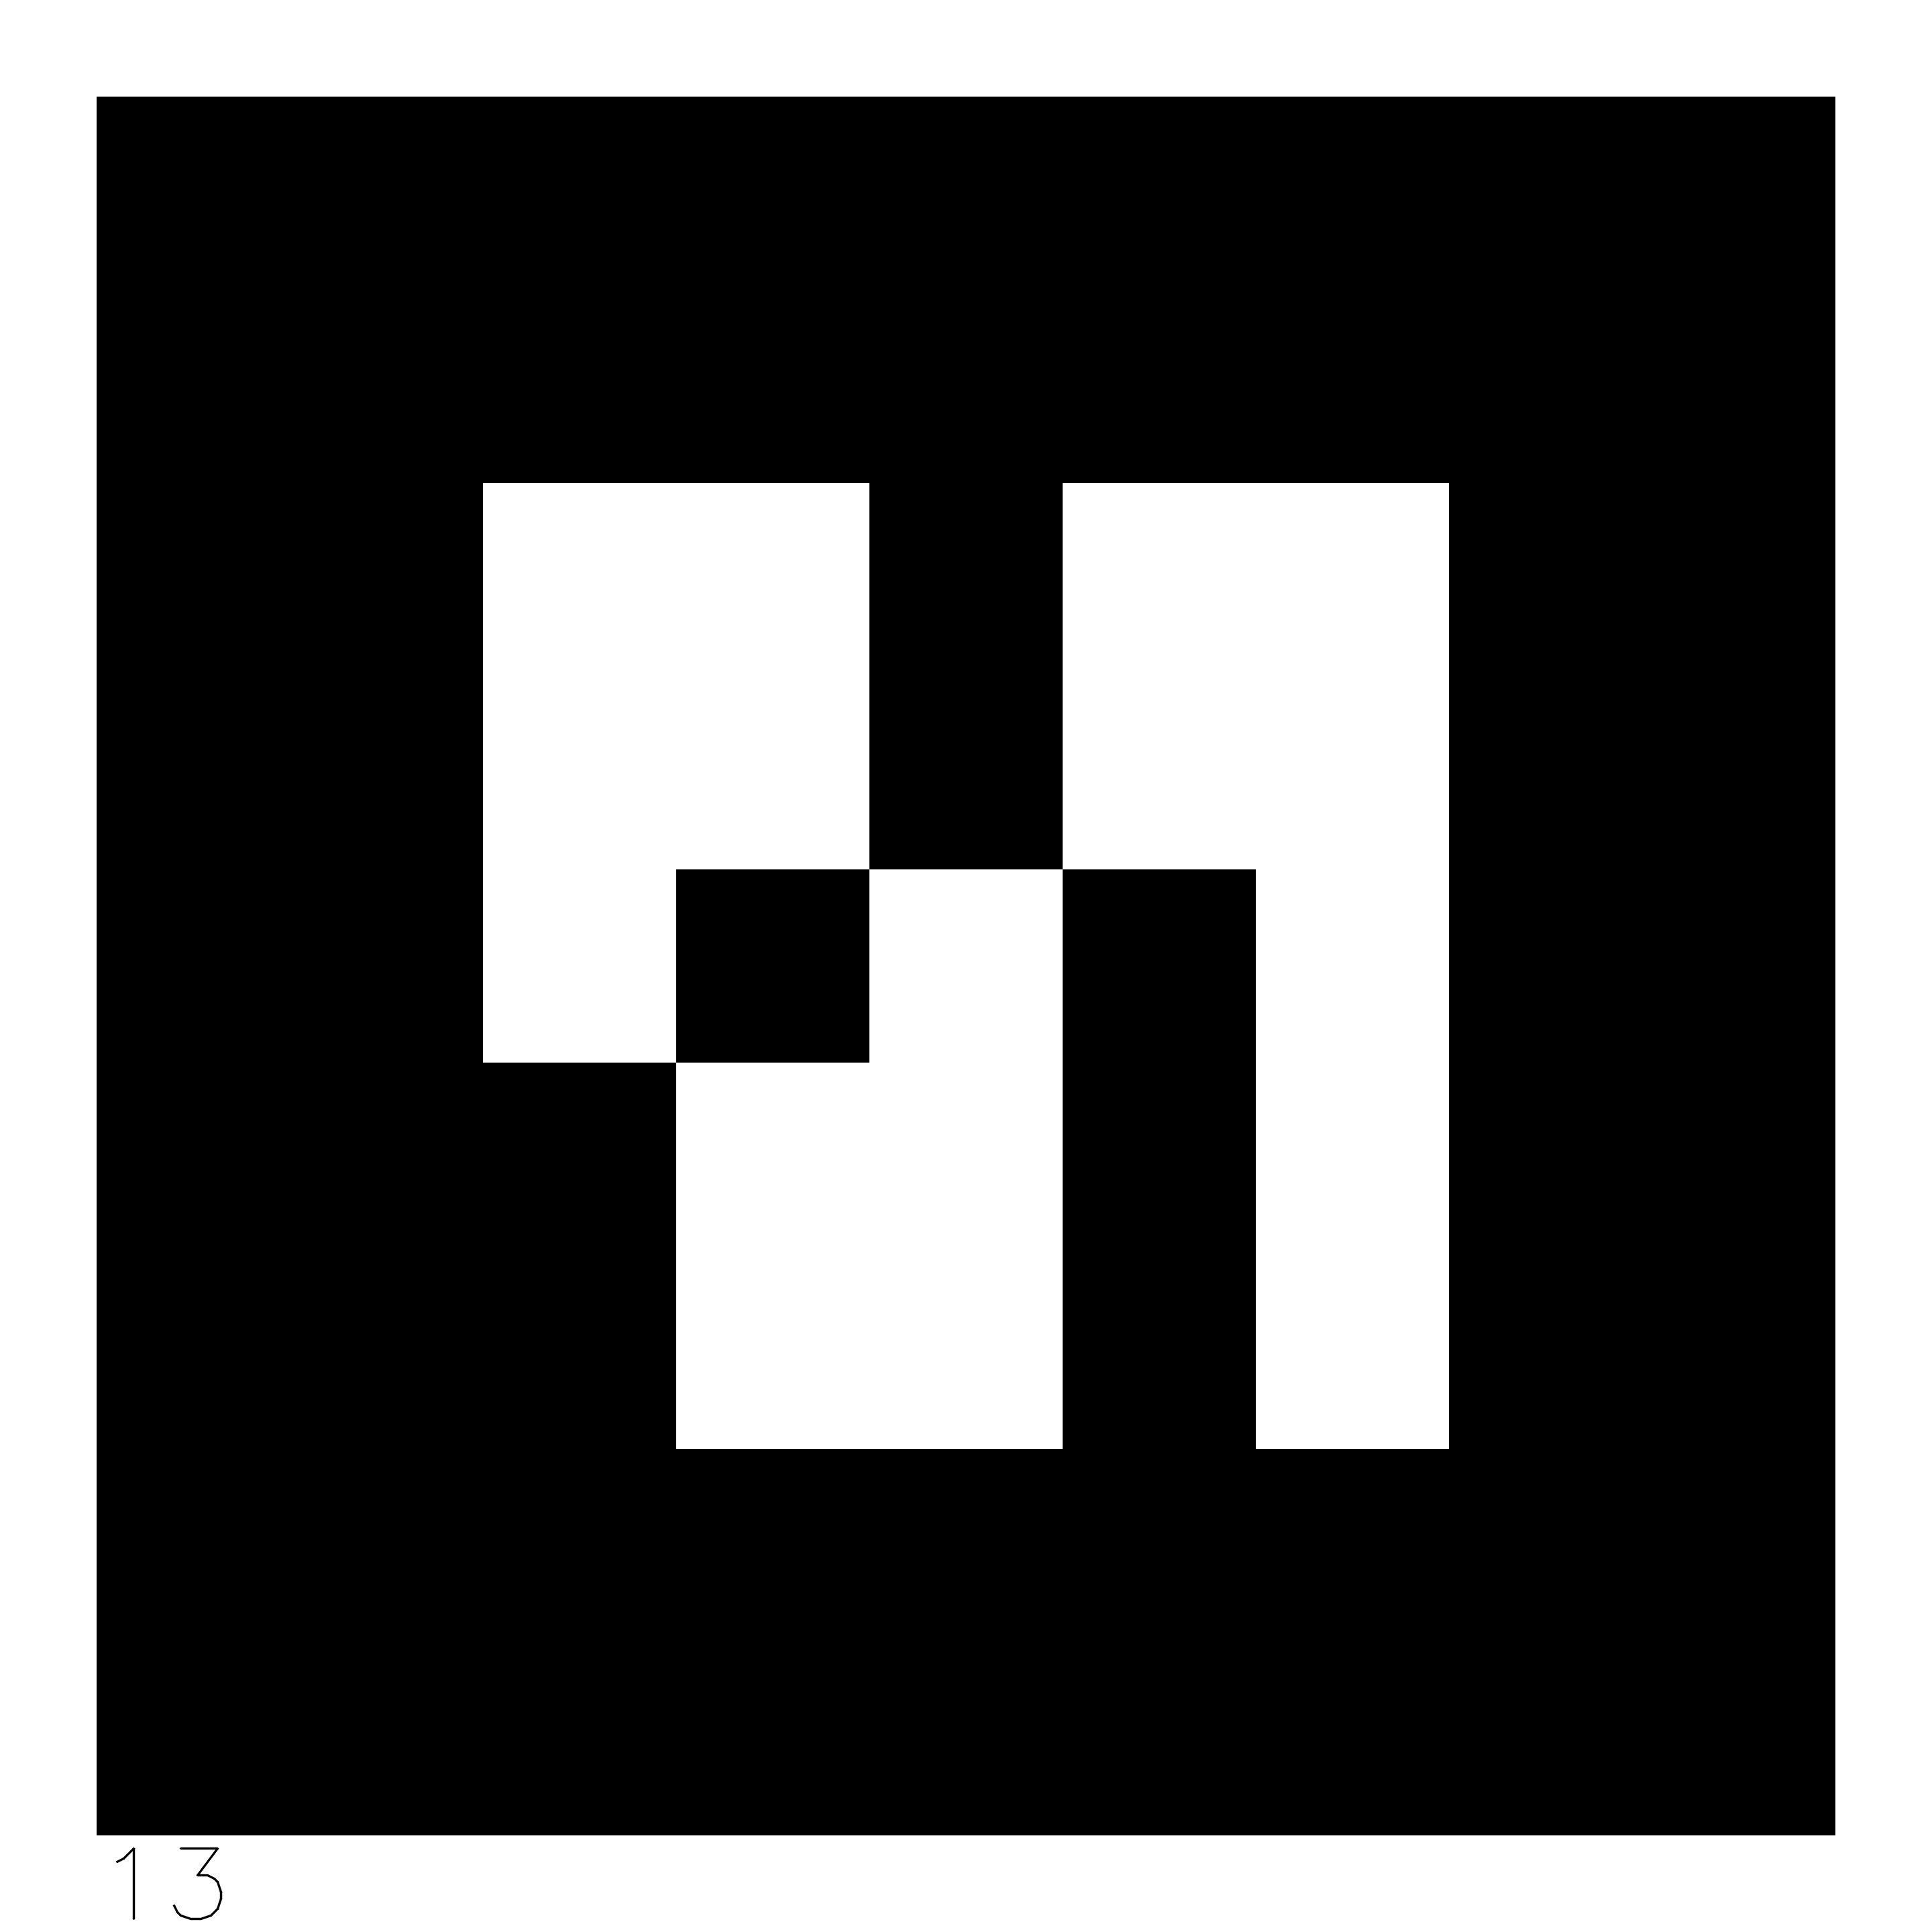

In [1]:
#!/usr/bin/env python
from subprocess import call
import cv2
import os

# Marker width in cm border to border
DESIRED_MARKER_SIZE_CM = 27.0

# Size of the white margin around the marker in cm
MARGIN_CM = 1.5

# Marker resolution in pixels per centimeter
PPCM = 96

# Number of units from edge to edge. Ex. a 5x5 AR tag with a 2 unit border has 9 units edge to edge
MARKER_UNIT_SIZE = 9

# Number of pixels per AR tag unit
PIXELS_PER_UNIT = DESIRED_MARKER_SIZE_CM/MARKER_UNIT_SIZE * PPCM

# Size of the white margin around the marker in pixels
MARGIN_PX = int(PPCM*MARGIN_CM)


for marker_number in range(0, 100):
    '''
    Call ar_track_alvar's generation script.
    The syntax is identical to the command line
    The marker's number must be last
    '''
    call(['rosrun', 'ar_track_alvar', 'createMarker', '-u', str(PIXELS_PER_UNIT), str(marker_number)])

    # Alvar generates the marker with this name
    initial_file_name = "MarkerData_" + str(marker_number) + ".png"

    # Save the marker with this name
    final_file_name = "Marker_" + str(marker_number) + ".png"

    '''
    This part adds a margin and adds the number to the lower left margin of the image
    '''
    marker = cv2.imread(initial_file_name, cv2.IMREAD_GRAYSCALE)

    # Add a white margin to the marker
    padded_marker = cv2.copyMakeBorder(marker,MARGIN_PX,MARGIN_PX,MARGIN_PX,MARGIN_PX,cv2.BORDER_CONSTANT,value=255)

    height, width = padded_marker.shape

    # Add the marker number to the marker
    cv2.putText(padded_marker,str(marker_number),(MARGIN_PX, height - 20),cv2.FONT_HERSHEY_SIMPLEX,5,0,2,cv2.LINE_AA)

    # Delete the original file
    os.remove(initial_file_name)

    # Save the labeled marker with our new file name
    cv2.imwrite(final_file_name, padded_marker)